In [1]:
#Imports
import re
import string
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.initializers import RandomNormal

## Question 1 & 2

In [3]:
# Path to the input text file
input_file_path = r"C:\Users\leboh\OneDrive - University of Witwatersrand\Desktop\Masters (Data Science)\My\NLP\Lab 1\Harry potter lab dataset.txt"

# Function to clean and split text
def clean_and_split_text(file_path):
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    
    # Remove punctuation (including speech marks)
    text = re.sub(r'[^\w\s]', '', text.lower())
    
    # Split text by whitespace
    words = text.split()
    
    return words

# Get the cleaned and split words
words = clean_and_split_text(input_file_path)

print(words)

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'he', 'left', 'the', 'building', 'at', 'five', 'oclock', 'he', 'was', 'still', 'so', 'worried', 'that', 'he', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'the', 'door', 'sorry', 'he', 'grunted', 'as', 'the', 'tiny', 'old', 'man', 'stumbled', 'and', 'almost', 'fell', 'it', 'was', 'a', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'that', 'the', 'man', 'was', 'wearing', 'a', 'violet', 'cloak', 'he', 'didnt', 'seem', 'at', 'all', 'upset', 'at', 'being', 'almost', 'knocked', 'to', 'the', 'ground', 'on', 'the', 'contrary', 'his', 'face', 'split', 'into', 'a', 'wide', 'smile', 'and', 'he', 'said', 'in', 'a', 'squeaky', 'voice', 'that', 'made', 'passersby', 'stare', 'dont', 'be', 'sorry', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'upset', 'me', 'today', 'rejoice', 'for', 'you', 'knowwho', 'has', 'gone', 'at', 'last', 'even', 'muggles', 'like', '

In [4]:
len(words)

298

In [5]:
sum(pd.Series(words).duplicated())

127

## Question 3

In [7]:
words_series = pd.Series(words)
unique_words = words_series.drop_duplicates().tolist()
print(unique_words)

['he', 'found', 'it', 'a', 'lot', 'harder', 'to', 'concentrate', 'on', 'drills', 'that', 'afternoon', 'and', 'when', 'left', 'the', 'building', 'at', 'five', 'oclock', 'was', 'still', 'so', 'worried', 'walked', 'straight', 'into', 'someone', 'just', 'outside', 'door', 'sorry', 'grunted', 'as', 'tiny', 'old', 'man', 'stumbled', 'almost', 'fell', 'few', 'seconds', 'before', 'mr', 'dursley', 'realized', 'wearing', 'violet', 'cloak', 'didnt', 'seem', 'all', 'upset', 'being', 'knocked', 'ground', 'contrary', 'his', 'face', 'split', 'wide', 'smile', 'said', 'in', 'squeaky', 'voice', 'made', 'passersby', 'stare', 'dont', 'be', 'my', 'dear', 'sir', 'for', 'nothing', 'could', 'me', 'today', 'rejoice', 'you', 'knowwho', 'has', 'gone', 'last', 'even', 'muggles', 'like', 'yourself', 'should', 'celebrating', 'this', 'happy', 'day', 'hugged', 'around', 'middle', 'off', 'stood', 'rooted', 'spot', 'had', 'been', 'by', 'complete', 'stranger', 'also', 'thought', 'called', 'muggle', 'whatever', 'rattled'

In [8]:
sum(pd.Series(unique_words).duplicated())

0

In [9]:
len(unique_words)

171

## Question 4

In [11]:
def one_hot_vectors(words):
    # Create a dictionary to map each
    # unique word to an index
    word_to_index = {}
    for i, word in enumerate(words):
        word_to_index[word] = i
    
    # Create one-hot encoded vectors for
    # each word in the corpus
    one_hot_vectors = []
    for word in words:
        vector = np.zeros(len(words))
        vector[word_to_index[word]] = 1
        one_hot_vectors.append(vector)

    return one_hot_vectors

In [12]:
encoded_words = one_hot_vectors(unique_words)

In [13]:
encoded_words

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [14]:
len(encoded_words)

171

## QUESTION 5

In [16]:
def create_context_dataset(words, window_size=2):
    context_pairs = []

    for i in range(window_size, len(words) - window_size):
        input_word = words[i]
        context_words = words[i - window_size:i] + words[i + 1:i + 1 + window_size]

        for context_word in context_words:
            context_pairs.append((input_word, context_word))
    
    return context_pairs

context_pairs = create_context_dataset(words)

for pair in context_pairs:
    print(f"Input (Word): {pair[0]}, Label (Context Word): {pair[1]}")

Input (Word): it, Label (Context Word): he
Input (Word): it, Label (Context Word): found
Input (Word): it, Label (Context Word): a
Input (Word): it, Label (Context Word): lot
Input (Word): a, Label (Context Word): found
Input (Word): a, Label (Context Word): it
Input (Word): a, Label (Context Word): lot
Input (Word): a, Label (Context Word): harder
Input (Word): lot, Label (Context Word): it
Input (Word): lot, Label (Context Word): a
Input (Word): lot, Label (Context Word): harder
Input (Word): lot, Label (Context Word): to
Input (Word): harder, Label (Context Word): a
Input (Word): harder, Label (Context Word): lot
Input (Word): harder, Label (Context Word): to
Input (Word): harder, Label (Context Word): concentrate
Input (Word): to, Label (Context Word): lot
Input (Word): to, Label (Context Word): harder
Input (Word): to, Label (Context Word): concentrate
Input (Word): to, Label (Context Word): on
Input (Word): concentrate, Label (Context Word): harder
Input (Word): concentrate, Labe

## Question 6

In [18]:
# Assuming 'unique_words' and 'context_pairs' are available
# Extract vocabulary and mapping from unique_words
vocab_size = len(unique_words)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}

# Prepare training data
def word_to_one_hot(word, word_to_index, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[word_to_index[word]] = 1
    return one_hot_vector

X_train = []
y_train = []

for input_word, context_word in context_pairs:
    X_train.append(word_to_one_hot(input_word, word_to_index, vocab_size))
    y_train.append(word_to_one_hot(context_word, word_to_index, vocab_size))

X_train = np.array(X_train)
y_train = np.array(y_train)

# Define the model with small random Gaussian weights
initializer = RandomNormal(mean=0.0, stddev=0.05)  # small random values

model = Sequential([
    Input(shape=(vocab_size,)),
    Dense(200, activation='relu', kernel_initializer=initializer),  # Linear hidden layer
    Dense(vocab_size, activation='softmax', kernel_initializer=initializer)  # Output layer
])

# Compile the model with a large learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

history.history


Epoch 1/50
37/37 - 1s - 21ms/step - accuracy: 0.0536 - loss: 4.9377
Epoch 2/50
37/37 - 0s - 2ms/step - accuracy: 0.0859 - loss: 4.3954
Epoch 3/50
37/37 - 0s - 1ms/step - accuracy: 0.0978 - loss: 3.7439
Epoch 4/50
37/37 - 0s - 1ms/step - accuracy: 0.0944 - loss: 3.0962
Epoch 5/50
37/37 - 0s - 1ms/step - accuracy: 0.0859 - loss: 2.8787
Epoch 6/50
37/37 - 0s - 1ms/step - accuracy: 0.1054 - loss: 2.7463
Epoch 7/50
37/37 - 0s - 1ms/step - accuracy: 0.0918 - loss: 2.6850
Epoch 8/50
37/37 - 0s - 1ms/step - accuracy: 0.1054 - loss: 2.6362
Epoch 9/50
37/37 - 0s - 1ms/step - accuracy: 0.1020 - loss: 2.6223
Epoch 10/50
37/37 - 0s - 1ms/step - accuracy: 0.0952 - loss: 2.5840
Epoch 11/50
37/37 - 0s - 1ms/step - accuracy: 0.0969 - loss: 2.5573
Epoch 12/50
37/37 - 0s - 2ms/step - accuracy: 0.0944 - loss: 2.5673
Epoch 13/50
37/37 - 0s - 3ms/step - accuracy: 0.0952 - loss: 2.5484
Epoch 14/50
37/37 - 0s - 3ms/step - accuracy: 0.1080 - loss: 2.5270
Epoch 15/50
37/37 - 0s - 2ms/step - accuracy: 0.1020 - l

{'accuracy': [0.0535714291036129,
  0.08588435500860214,
  0.09778911620378494,
  0.09438775479793549,
  0.08588435500860214,
  0.10544217377901077,
  0.09183673560619354,
  0.10544217377901077,
  0.10204081982374191,
  0.095238097012043,
  0.09693877398967743,
  0.09438775479793549,
  0.095238097012043,
  0.10799320042133331,
  0.10204081982374191,
  0.09863945841789246,
  0.10034013539552689,
  0.095238097012043,
  0.10204081982374191,
  0.09013605117797852,
  0.08673469722270966,
  0.11054421961307526,
  0.1130952388048172,
  0.095238097012043,
  0.10374149680137634,
  0.10034013539552689,
  0.11224489659070969,
  0.09778911620378494,
  0.10289115458726883,
  0.09608843177556992,
  0.10459183901548386,
  0.11139455437660217,
  0.11139455437660217,
  0.10034013539552689,
  0.11394558101892471,
  0.09268707782030106,
  0.10799320042133331,
  0.09693877398967743,
  0.10374149680137634,
  0.1130952388048172,
  0.1011904776096344,
  0.11564625799655914,
  0.09948979318141937,
  0.1113945

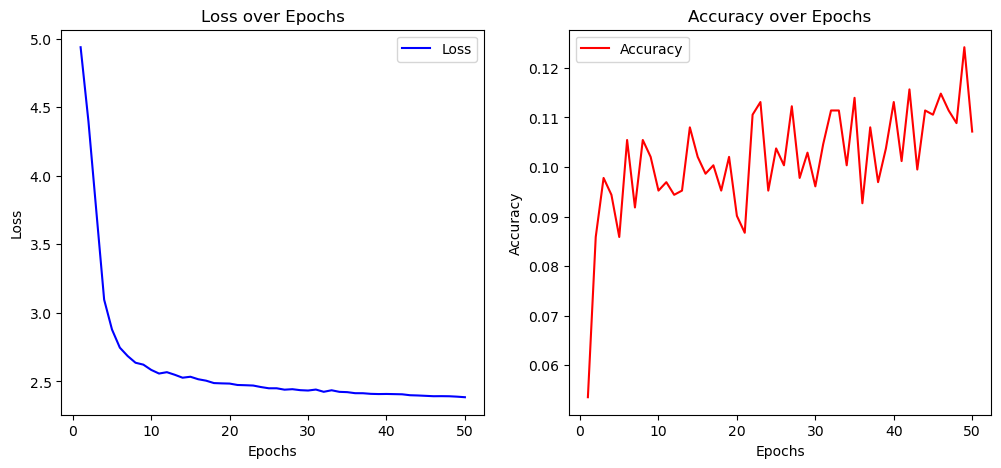

In [37]:
import matplotlib.pyplot as plt

# Assuming the model has been trained and 'history' is available

# Extract loss and accuracy from history
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r-', label='Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.show()


## Question 7

In [20]:
def get_embedding(one_hot_vector, model):
    # Extract the weights from the first layer (hidden layer)
    embedding_weights = model.layers[0].get_weights()[0]
    
    # Calculate the embedding by performing a dot product between the one-hot vector and the embedding weights
    embedding = np.dot(one_hot_vector, embedding_weights)
    
    return embedding

In [21]:
# Create a dictionary to store embeddings for each word
embeddings_dict = {}

# Loop through each word in the vocabulary
for word, index in word_to_index.items():
    # Create a one-hot vector for the current word
    one_hot_vector = np.zeros(vocab_size)
    one_hot_vector[index] = 1
    
    # Get the embedding using the get_embedding function
    embedding = get_embedding(one_hot_vector, model)
    
    # Store the embedding in the dictionary
    embeddings_dict[word] = embedding

# Display embeddings for all words
for word, embedding in embeddings_dict.items():
    print(f"Word: {word}, Embedding: {embedding}")


Word: he, Embedding: [-0.15964893  0.34996903 -0.06259815  0.14515723  0.28482234 -0.1155408
  0.03613238 -0.1536136  -0.09207263 -0.12872456  0.18853979 -0.05878134
  0.34578472 -0.11803103 -0.11402944 -0.07675528 -0.18460022 -0.1224321
  0.18010759 -0.1375573  -0.00657751 -0.13285705 -0.20664051 -0.2016938
  0.39134565 -0.12850061  0.21224943 -0.31421369 -0.1276087  -0.09752405
 -0.04012685 -0.11390236 -0.01949224 -0.03219889 -0.25298381 -0.20206237
 -0.11871906  0.61563468 -0.1294983  -0.19450383 -0.1866795  -0.13119227
 -0.00554062 -0.12312973 -0.11113668 -0.08503305 -0.18742853  0.06035837
 -0.23147339 -0.21320397  0.33233279 -0.18594094 -0.0828665   0.31321076
 -0.1289257   0.11108012  0.21234982 -0.146126   -0.19776846 -0.12053642
 -0.12602901 -0.21450222 -0.04474029 -0.04119015 -0.0970098  -0.15197444
 -0.30735722 -0.19418497 -0.06478118 -0.12809341 -0.16874059 -0.15115292
 -0.14464447 -0.12776093 -0.14267884  0.28014085 -0.19260427 -0.22199325
 -0.01703225 -0.13210778 -0.09681